<a href="https://colab.research.google.com/github/Shreya72Dubey/Analysis-of-Insurance-Data/blob/main/Data_Science_Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Loading necessary libraries for reading and manipulating
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Checking the versions of libraries
print('The version of NumPy :',np.__version__)
print('The version of Pandas :',pd.__version__)
print('The version of Matplotlib :',matplotlib.__version__)
print('The version of Seaborn :',sns.__version__)

The version of NumPy : 1.23.5
The version of Pandas : 1.5.3
The version of Matplotlib : 3.7.1
The version of Seaborn : 0.12.2


In [ ]:
# Loading the dataset into dataframe
df=pd.read_csv('/content/sample_data/Insurance_Data.csv')
# Printing top 5 records from the dataframe
df.head()

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,...,smoking_status,Year_last_admitted,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,5000,3,1,1,Salried,2,125 to 150,4866,28,1,...,Unknown,NaN,Chennai,67,N,Rare,Moderate,1,25,20978
1,5001,0,0,0,Student,4,150 to 175,6411,50,0,...,formerly smoked,NaN,Jaipur,58,N,Rare,Moderate,3,27,6170
2,5002,1,0,0,Business,4,200 to 225,4509,68,0,...,formerly smoked,NaN,Jaipur,73,N,Daily,Extreme,0,32,28382
3,5003,7,4,0,Business,2,175 to 200,6214,51,0,...,Unknown,NaN,Chennai,71,Y,Rare,No,3,37,27148
4,5004,3,1,0,Student,2,150 to 175,4938,44,0,...,never smoked,2004.0,Bangalore,74,N,No,Extreme,0,34,29616


In [ ]:
# Checking the number of rows and columns in dataframe
print('The number of Rows : ',df.shape[0])
print('The number of Columns : ',df.shape[1])

The number of Rows :  25000
The number of Columns :  24


In [ ]:
# Checking the number of duplicate records in dataset
duplicates = df.duplicated()
print('Number of duplicate records = %d' % (duplicates.sum()))

Number of duplicate records = 0


In [ ]:
# Checking for the more information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   applicant_id                    25000 non-null  int64  
 1   years_of_insurance_with_us      25000 non-null  int64  
 2   regular_checkup_lasy_year       25000 non-null  int64  
 3   adventure_sports                25000 non-null  int64  
 4   Occupation                      25000 non-null  object 
 5   visited_doctor_last_1_year      25000 non-null  int64  
 6   cholesterol_level               25000 non-null  object 
 7   daily_avg_steps                 25000 non-null  int64  
 8   age                             25000 non-null  int64  
 9   heart_decs_history              25000 non-null  int64  
 10  other_major_decs_history        25000 non-null  int64  
 11  Gender                          25000 non-null  object 
 12  avg_glucose_level               

In [ ]:
# Checking for the missing values in dataset
df.isnull().sum()

applicant_id                          0
years_of_insurance_with_us            0
regular_checkup_lasy_year             0
adventure_sports                      0
Occupation                            0
visited_doctor_last_1_year            0
cholesterol_level                     0
daily_avg_steps                       0
age                                   0
heart_decs_history                    0
other_major_decs_history              0
Gender                                0
avg_glucose_level                     0
bmi                                 990
smoking_status                        0
Year_last_admitted                11881
Location                              0
weight                                0
covered_by_any_other_company          0
Alcohol                               0
exercise                              0
weight_change_in_last_one_year        0
fat_percentage                        0
insurance_cost                        0
dtype: int64

In [ ]:
# Extracting the rows which have missing values in 'bmi'
df[df.bmi.isnull()]

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,...,smoking_status,Year_last_admitted,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
41,5041,1,0,0,Salried,1,225 to 250,4686,47,1,...,never smoked,NaN,Ahmedabad,82,N,Rare,Moderate,1,31,38254
170,5170,4,3,0,Salried,3,125 to 150,8987,65,1,...,smokes,2014.0,Kolkata,62,Y,Rare,No,1,25,8638
217,5217,4,0,0,Salried,3,225 to 250,5802,71,0,...,smokes,2008.0,Guwahati,74,N,No,No,2,40,27148
285,5285,4,0,0,Salried,2,125 to 150,4626,26,0,...,formerly smoked,2004.0,Ahmedabad,70,N,Rare,No,2,19,28382
289,5289,3,0,1,Business,2,200 to 225,4965,70,0,...,never smoked,2000.0,Bhubaneswar,95,N,Rare,Moderate,0,22,62934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24962,29962,4,0,0,Business,2,200 to 225,5059,68,1,...,never smoked,1999.0,Nagpur,71,N,Rare,Extreme,1,42,29616
24965,29965,3,0,0,Salried,4,125 to 150,4292,48,0,...,never smoked,2003.0,Mangalore,78,N,Daily,Moderate,0,19,35786
24968,29968,5,1,0,Business,3,150 to 175,5646,32,0,...,never smoked,1994.0,Kanpur,80,Y,No,Extreme,3,21,43190
24976,29976,8,4,0,Student,3,125 to 150,4786,24,1,...,Unknown,2006.0,Bangalore,71,Y,Rare,Moderate,3,16,24680


In [ ]:
# Since the ‘bmi’ feature is an important parameter for applicant health
# Imputing any values in this will change the data to greater extend so we are removing them from the data frame for further processing
df=pd.DataFrame(df)
df=df.dropna(subset=['bmi'])

In [ ]:
df=df.reset_index()

In [ ]:
# Checking for the other missing values in dataset
df.isnull().sum()

index                                 0
applicant_id                          0
years_of_insurance_with_us            0
regular_checkup_lasy_year             0
adventure_sports                      0
Occupation                            0
visited_doctor_last_1_year            0
cholesterol_level                     0
daily_avg_steps                       0
age                                   0
heart_decs_history                    0
other_major_decs_history              0
Gender                                0
avg_glucose_level                     0
bmi                                   0
smoking_status                        0
Year_last_admitted                11429
Location                              0
weight                                0
covered_by_any_other_company          0
Alcohol                               0
exercise                              0
weight_change_in_last_one_year        0
fat_percentage                        0
insurance_cost                        0


In [ ]:
# Extracting the rows which have missing values in 'Year_last_admitted'
df[df.Year_last_admitted.isnull()]

,index,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,...,smoking_status,Year_last_admitted,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,0,5000,3,1,1,Salried,2,125 to 150,4866,28,...,Unknown,NaN,Chennai,67,N,Rare,Moderate,1,25,20978
1,1,5001,0,0,0,Student,4,150 to 175,6411,50,...,formerly smoked,NaN,Jaipur,58,N,Rare,Moderate,3,27,6170
2,2,5002,1,0,0,Business,4,200 to 225,4509,68,...,formerly smoked,NaN,Jaipur,73,N,Daily,Extreme,0,32,28382
3,3,5003,7,4,0,Business,2,175 to 200,6214,51,...,Unknown,NaN,Chennai,71,Y,Rare,No,3,37,27148
7,7,5007,1,0,0,Student,4,150 to 175,7448,46,...,smokes,NaN,Chennai,72,N,Rare,Moderate,0,34,29616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23996,24985,29985,7,0,0,Student,2,125 to 150,5352,63,...,never smoked,NaN,Mangalore,84,N,Rare,No,1,39,38254
23997,24986,29986,6,5,0,Salried,2,125 to 150,4802,44,...,smokes,NaN,Chennai,58,Y,Rare,Moderate,2,18,7404
24000,24989,29989,1,2,0,Business,5,200 to 225,4490,45,...,never smoked,NaN,Mangalore,67,N,Rare,Moderate,4,22,19744
24001,24990,29990,3,0,0,Salried,3,225 to 250,4329,22,...,Unknown,NaN,Guwahati,81,Y,Daily,Moderate,3,31,41956


In [ ]:
# The record for ‘last_admitted_year’ seems to be valid data for the applicants
# Imputing the missing values (NaN) in 'Year_last_admitted' column with 0 value
df.Year_last_admitted.replace(to_replace=np.NaN, value=0, inplace=True)

In [ ]:
# Verifying that their are no missing values in dataset
df.isnull().sum()

index                             0
applicant_id                      0
years_of_insurance_with_us        0
regular_checkup_lasy_year         0
adventure_sports                  0
Occupation                        0
visited_doctor_last_1_year        0
cholesterol_level                 0
daily_avg_steps                   0
age                               0
heart_decs_history                0
other_major_decs_history          0
Gender                            0
avg_glucose_level                 0
bmi                               0
smoking_status                    0
Year_last_admitted                0
Location                          0
weight                            0
covered_by_any_other_company      0
Alcohol                           0
exercise                          0
weight_change_in_last_one_year    0
fat_percentage                    0
insurance_cost                    0
dtype: int64

In [ ]:
# Checking statistical summary of only numerical columns in dataset. Also transforming rows into coloumns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,24010.0,12498.169263,7218.986595,0.0,6249.25,12498.5,18754.75,24999.0
applicant_id,24010.0,17498.169263,7218.986595,5000.0,11249.25,17498.5,23754.75,29999.0
years_of_insurance_with_us,24010.0,4.085173,2.607822,0.0,2.00,4.0,6.00,8.0
regular_checkup_lasy_year,24010.0,0.773719,1.200497,0.0,0.00,0.0,1.00,5.0
adventure_sports,24010.0,0.081924,0.274255,0.0,0.00,0.0,0.00,1.0
visited_doctor_last_1_year,24010.0,3.105414,1.143030,0.0,2.00,3.0,4.00,12.0
daily_avg_steps,24010.0,5215.863265,1053.556213,2034.0,4543.00,5089.0,5730.75,11255.0
age,24010.0,44.918867,16.087804,16.0,31.00,45.0,59.00,74.0
heart_decs_history,24010.0,0.050229,0.218422,0.0,0.00,0.0,0.00,1.0
other_major_decs_history,24010.0,0.092545,0.289799,0.0,0.00,0.0,0.00,1.0


In [ ]:
# Checking statistical summary of all columns (both numerical & categorical) in dataset. Also transforming rows into columns
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,24010.0,NaN,NaN,NaN,12498.169263,7218.986595,0.0,6249.25,12498.5,18754.75,24999.0
applicant_id,24010.0,NaN,NaN,NaN,17498.169263,7218.986595,5000.0,11249.25,17498.5,23754.75,29999.0
years_of_insurance_with_us,24010.0,NaN,NaN,NaN,4.085173,2.607822,0.0,2.0,4.0,6.0,8.0
regular_checkup_lasy_year,24010.0,NaN,NaN,NaN,0.773719,1.200497,0.0,0.0,0.0,1.0,5.0
adventure_sports,24010.0,NaN,NaN,NaN,0.081924,0.274255,0.0,0.0,0.0,0.0,1.0
Occupation,24010,3,Student,9748,NaN,NaN,NaN,NaN,NaN,NaN,NaN
visited_doctor_last_1_year,24010.0,NaN,NaN,NaN,3.105414,1.14303,0.0,2.0,3.0,4.0,12.0
cholesterol_level,24010,5,150 to 175,8396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
daily_avg_steps,24010.0,NaN,NaN,NaN,5215.863265,1053.556213,2034.0,4543.0,5089.0,5730.75,11255.0
age,24010.0,NaN,NaN,NaN,44.918867,16.087804,16.0,31.0,45.0,59.0,74.0


In [ ]:
# Check for and Treat (if needed) Data Irregularities
# Checking the unique levels available in the object type variables. There are 8 object/categorial variables
# Categorical Variable-1: Occupation
df.Occupation.value_counts()

Student     9748
Business    9649
Salried     4613
Name: Occupation, dtype: int64

In [ ]:
# Categorical Variable-2: cholesterol_level
df.cholesterol_level.value_counts()

150 to 175    8396
125 to 150    8001
200 to 225    2862
175 to 200    2778
225 to 250    1973
Name: cholesterol_level, dtype: int64

In [ ]:
# Categorical Variable-3: Gender
df.Gender.value_counts()

Male      15689
Female     8321
Name: Gender, dtype: int64

In [ ]:
# Categorical Variable-4: smoking_status
df.smoking_status.value_counts()

never smoked       9052
Unknown            7253
formerly smoked    4091
smokes             3614
Name: smoking_status, dtype: int64

In [ ]:
# Categorical Variable-5: Location
df.Location.value_counts()

Bangalore      1670
Jaipur         1640
Bhubaneswar    1635
Mangalore      1626
Delhi          1613
Chennai        1612
Ahmedabad      1605
Guwahati       1598
Kanpur         1595
Mumbai         1591
Nagpur         1584
Lucknow        1581
Pune           1573
Kolkata        1562
Surat          1525
Name: Location, dtype: int64

In [ ]:
# Categorical Variable-6: covered_by_any_other_company
df.covered_by_any_other_company.value_counts()

N    16740
Y     7270
Name: covered_by_any_other_company, dtype: int64

In [ ]:
# Categorical Variable-7: Alcohol
df.Alcohol.value_counts()

Rare     13202
No        8202
Daily     2606
Name: Alcohol, dtype: int64

In [ ]:
# Categorical Variable-8: exercise
df.exercise.value_counts()

Moderate    14103
Extreme      5006
No           4901
Name: exercise, dtype: int64

In [ ]:
# No, There are no data irregularities found in the dataset.

**Univariate** **Analysis**

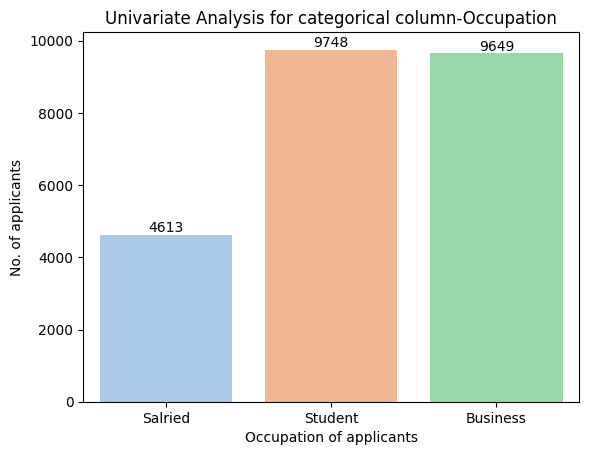

Student     0.405998
Business    0.401874
Salried     0.192128
Name: Occupation, dtype: float64

In [ ]:
# Categorical Variable-1: Occupation
occupation=sns.countplot(data=df, x='Occupation', palette='pastel');
plt.title('Univariate Analysis for categorical column-Occupation')
plt.ylabel('No. of applicants')
plt.xlabel('Occupation of applicants')
for label in occupation.containers:
  occupation.bar_label(label)
plt.show()
df['Occupation'].value_counts(normalize=True)

In [ ]:
#Sorting dataset by cholesterol_level in ascending order
df=df.sort_values(by='cholesterol_level', ascending=True)

In [ ]:
# Categorical Variable-2: cholesterol_level
cholesterollevel=sns.countplot(data=df, x='cholesterol_level', palette='pastel');
plt.title('Univariate Analysis for categorical column-cholesterol_level')
plt.ylabel('No. of applicants')
plt.xlabel('Cholesterol level of applicants')
for label in cholesterol_level.containers:
  cholesterol_level.bar_label(label)
plt.show()
df['cholesterol_level'].value_counts(normalize=True)

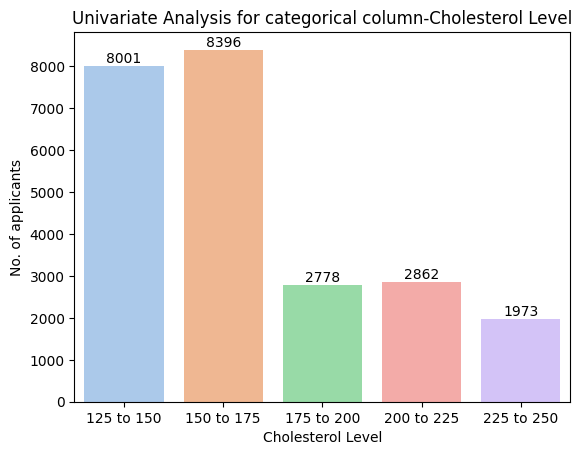

In [ ]:
#Univariate Analysis for Categorical column-cholesterol_level
cholesterol_level=sns.countplot(data=df, x='cholesterol_level', palette='pastel');
plt.title('Univariate Analysis for categorical column-Cholesterol Level')
plt.ylabel('No. of applicants')
plt.xlabel('Cholesterol Level')
for label in cholesterol_level.containers:
  cholesterol_level.bar_label(label)
plt.show()

In [ ]:
df['cholesterol_level'].value_counts(normalize=True).sort_values(ascending=False)

150 to 175    0.349688
125 to 150    0.333236
200 to 225    0.119200
175 to 200    0.115702
225 to 250    0.082174
Name: cholesterol_level, dtype: float64

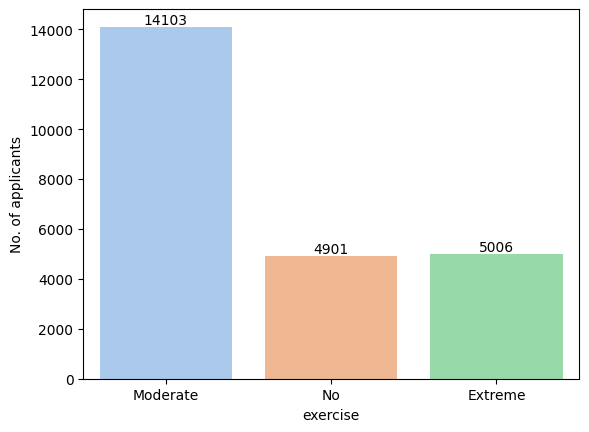

In [ ]:
exercise=sns.countplot(data=df, x='exercise', palette='pastel');
plt.ylabel('No. of applicants')
for label in exercise.containers:
  exercise.bar_label(label)
plt.show()

In [ ]:
df['exercise'].value_counts(normalize=True)

Moderate    0.587380
Extreme     0.208496
No          0.204123
Name: exercise, dtype: float64

In [ ]:
#Univariate Analysis for Numerical column : years_of_insurance_with_us
df['years_of_insurance_with_us'].describe()

count    24010.000000
mean         4.085173
std          2.607822
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
max          8.000000
Name: years_of_insurance_with_us, dtype: float64

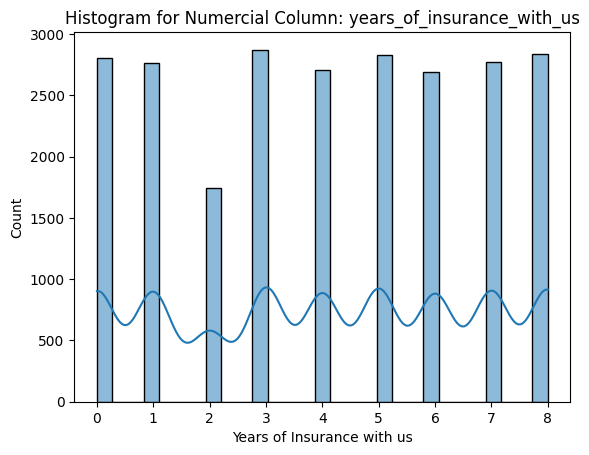

In [ ]:
sns.histplot(data=df,x='years_of_insurance_with_us',kde=True);
plt.title('Histogram for Numercial Column: years_of_insurance_with_us')
plt.xlabel('Years of Insurance with us')
plt.show()

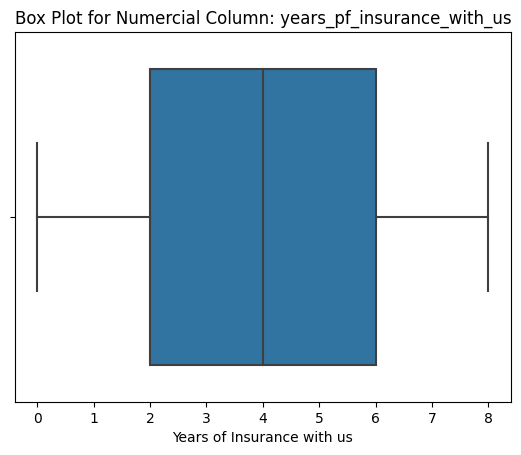

In [ ]:
sns.boxplot(data=df,x='years_of_insurance_with_us');
plt.title('Box Plot for Numercial Column: years_pf_insurance_with_us')
plt.xlabel('Years of Insurance with us')
plt.show()

In [ ]:
df['years_of_insurance_with_us'].value_counts(normalize=True)

3    0.119575
8    0.118242
5    0.117743
0    0.116660
7    0.115410
1    0.114952
4    0.112745
6    0.112162
2    0.072511
Name: years_of_insurance_with_us, dtype: float64

In [ ]:
df['regular_checkup_lasy_year'].describe()

count    24010.000000
mean         0.773719
std          1.200497
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: regular_checkup_lasy_year, dtype: float64

In [ ]:
sns.histplot(data=df,x='regular_checkup_lasy_year',kde=True);

In [ ]:
sns.boxplot(data=df,x='regular_checkup_lasy_year');

In [ ]:
df['regular_checkup_lasy_year'].value_counts(normalize=True)

In [ ]:
df['heart_decs_history']=df['heart_decs_history'].astype('object')

In [ ]:
df.info()

In [ ]:
heart_decs_history=sns.countplot(data=df, x='heart_decs_history', palette='pastel');
plt.ylabel('No. of applicants')
for label in heart_decs_history.containers:
  heart_decs_history.bar_label(label)
plt.show()

In [ ]:
df['heart_decs_history'].value_counts(normalize=True)

In [ ]:
# Bivariate Analysis

In [ ]:
# Exploring relationship between all numerical columns

In [ ]:
sns.pairplot(df)

In [ ]:
df_numerical1=pd.DataFrame()

In [ ]:
df_numerical1['years_of_insurance_with_us']=df['years_of_insurance_with_us']

In [ ]:
df_numerical1['regular_checkup_lasy_year']=df['regular_checkup_lasy_year']

In [ ]:
df_numerical1['adventure_sports']=df['adventure_sports']

In [ ]:
df_numerical1['visited_doctor_last_1_year']=df['visited_doctor_last_1_year']

In [ ]:
df_numerical1

In [ ]:
sns.pairplot(df_numerical1)

In [ ]:
# Plotting Heat Map
sns.heatmap(df_numerical1,annot=True)

In [ ]:
Occupation=sns.countplot(data=df, x='Occupation', palette='pastel', hue='Gender');
plt.ylabel('No. of applicants')
for label in Occupation.containers:
  Occupation.bar_label(label)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
Occupation=sns.countplot(data=df, x='Location', palette='pastel', hue='exercise');
plt.ylabel('No. of applicants')
for label in Occupation.containers:
  Occupation.bar_label(label)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
Occupation=sns.countplot(data=df, x='Location', palette='pastel', hue='Gender');
plt.ylabel('No. of applicants')
for label in Occupation.containers:
  Occupation.bar_label(label)
plt.show()

In [ ]:
#sns.boxplot(x=categorical, y=numerical)
sns.boxplot(data=df, x='Occupation', y='years_of_insurance_with_us');

In [ ]:
#sns.boxplot(x=categorical, y=numerical)
sns.boxplot(data=df, x='Gender', y='weight');

In [ ]:
df.groupby(['Gender']).agg(AverageWeight=('weight','mean'))

In [ ]:
#Multivariate Analysis


In [ ]:
#sns.boxplot(x=categorical, y=numerical, hue=categorical)
sns.boxplot(data=df, x='Gender', y='weight', hue='Alcohol');

In [ ]:
g=sns.FacetGrid(df,col='Location',hue='Gender',col_wrap=3,height=3)
g=g.map(plt.scatter,'years_of_insurance_with_us','age')
g.add_legend()